In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Mean', 'TDEsPopMetric__some_color_pu_Mean',
       'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u', 'DD:EDFSb,u',
       'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g',
       'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r', 'DD:XMM-LSS,r',
       'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r', 'DD:EDFSb,r',
       'DD:ELAISS1,i', 'DD:XMM-LSS,i', 'D

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
       'NEO bright', 'NEO faint', 'TNO']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0    baseline_nexp2
1         pause_sim
Name: runName, dtype: object

In [6]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'pause' in name]
runs

['baseline_nexp2', 'pause_sim']

In [7]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)

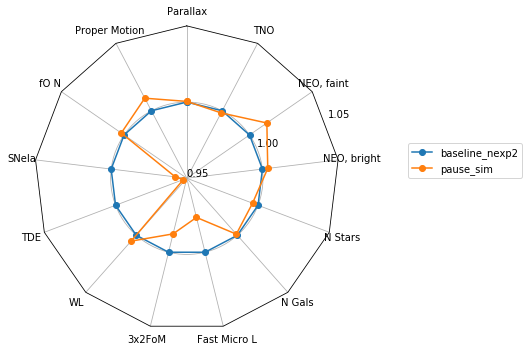

In [8]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.95, 1.0, 1.05])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [9]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
0,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,pause_sim,1.000438,1.009337,1.002252,0.957655,0.952381,1.005128,0.987595,0.976471,0.998994,0.996139,1.003513,1.013839,0.998439


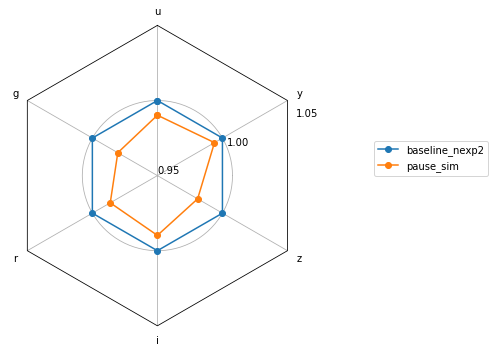

In [10]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.95, 1.0, 1.05], alpha=.1)
fig.tight_layout()

Quick hits looking at what happens if we pause the survey for 6 months, then resume:

* SNe and TDE's take ~5% hit
* Few % increase in proper motion precision and faint NEO detection
* Fast microlesning shows a change (but this metric is volitile in the default footprint, more bulge coverage would swamp this)
* The 3x2 metric shows a small hit, but this can probably be recovered (see below)

The median depths show the paused simulation ends a few tenths of mags shallower than the baseline across all filters.  This is probably caused by the scheduler attempting to recover from the extended downtime by pushing to higher airmass.  It is relatively straightforward to modify the scheduler footprint object so that it does not consider the 6-month downtime "missed". That should result in the usual low-airmass observations, and the median depth will be recovered (which drives the 3x2 metric decrease as well). Modifying the footprint object may also eliminate the gains in the faint NEO metric, as that could have been caused by higher airmass observations.

Note, this is our old SNe metric. We should switch to using the SNe metric provided by DESC to see if they concur on the magnitude of the loss.

Executive summary:  A 6 month pause causes a few percent drop in a few metrics. We can probably modify the scheduler to recover most of that, a few percent drop in SNe Ia and TDEs will probably persist.